<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_NLP_Power/blob/main/Results_MessageLength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/Joy_NLP_Power/main/data/Enron_merged_df.csv')
df.fillna('', inplace=True)


In [9]:
# number of tokens

df["n_tokens"] = df["tokens"].apply(len)
df["n_cleaned_tokens"] = df["cleaned_tokens"].apply(len)

In [10]:
# descriptive statistics for each directions

print(df.groupby("direction")["tokens"].apply(lambda x: x.apply(len).mean()))

print("\n")

print(df.groupby("direction")["cleaned_tokens"].apply(lambda x: x.apply(len).mean()))


direction
downward    222.223089
same        291.542440
upward      409.653355
Name: tokens, dtype: float64


direction
downward    126.313573
same        159.964191
upward      236.500000
Name: cleaned_tokens, dtype: float64


In [11]:
# ANOVA and posthoc

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# fit an ANOVA model with the 'values' column as the dependent variable and the 'group' column as the independent variable
model = ols('n_cleaned_tokens ~ C(direction)', data=df).fit()

# perform an ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# print the ANOVA table
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df['n_cleaned_tokens'], df['direction'])

# print the Tukey's HSD results
print(tukey_results)
print("\n\n")



                    sum_sq      df         F    PR(>F)
C(direction)  4.049455e+06     2.0  5.430588  0.004445
Residual      7.523863e+08  2018.0       NaN       NaN



  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper   reject
-------------------------------------------------------
downward   same  33.6506 0.5606  -43.29 110.5912  False
downward upward 110.1864 0.0038 29.7125 190.6604   True
    same upward  76.5358 0.0535 -0.9014 153.9731  False
-------------------------------------------------------





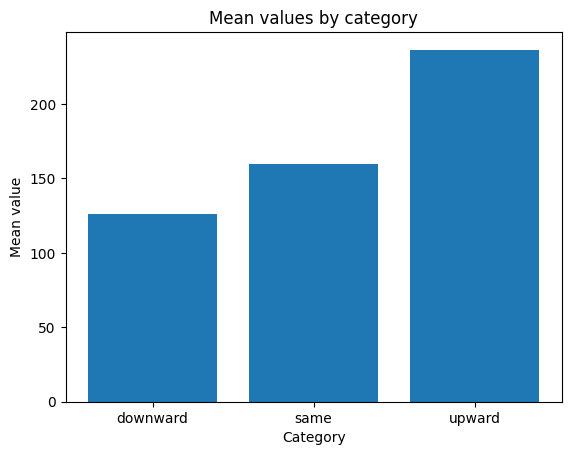

In [12]:
# graph for group means

import matplotlib.pyplot as plt
means =df.groupby('direction')['n_cleaned_tokens'].mean()
plt.bar(means.index, means.values)
plt.title('Mean values by category')
plt.xlabel('Category')
plt.ylabel('Mean value')
plt.show()
